<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Fraud-Class-분포" data-toc-modified-id="Fraud-Class-분포-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Fraud Class 분포</a></span></li><li><span><a href="#Time,-Amount-분포" data-toc-modified-id="Time,-Amount-분포-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Time, Amount 분포</a></span></li><li><span><a href="#Time-vs-Class" data-toc-modified-id="Time-vs-Class-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Time vs Class</a></span></li><li><span><a href="#Amount-VS-Class(분포)" data-toc-modified-id="Amount-VS-Class(분포)-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Amount VS Class(분포)</a></span></li><li><span><a href="#Amount-VS-Class(구간별-비율)" data-toc-modified-id="Amount-VS-Class(구간별-비율)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Amount VS Class(구간별 비율)</a></span></li><li><span><a href="#V-분포" data-toc-modified-id="V-분포-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>V 분포</a></span></li><li><span><a href="#T-test,-KS-test-for-V" data-toc-modified-id="T-test,-KS-test-for-V-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>T-test, KS-test for V</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Time-to-Day,-Hour" data-toc-modified-id="Time-to-Day,-Hour-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Time to Day, Hour</a></span></li><li><span><a href="#Amount_scaled-to-Interval" data-toc-modified-id="Amount_scaled-to-Interval-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Amount_scaled to Interval</a></span></li><li><span><a href="#Dummy-Variables" data-toc-modified-id="Dummy-Variables-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Dummy Variables</a></span></li></ul></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#변수-선택에-따른-결과-비교" data-toc-modified-id="변수-선택에-따른-결과-비교-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>변수 선택에 따른 결과 비교</a></span></li><li><span><a href="#Sampling에-따른-결과비교" data-toc-modified-id="Sampling에-따른-결과비교-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sampling에 따른 결과비교</a></span></li><li><span><a href="#Modeling" data-toc-modified-id="Modeling-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Logistic-Regression,SVC,KNN,Tree" data-toc-modified-id="Logistic-Regression,SVC,KNN,Tree-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Logistic Regression,SVC,KNN,Tree</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Neural Network</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Functions</a></span></li></ul></div>

In [93]:
# 전처리, 차원축소, 평가 모듈
import module.muresa as muresa

# 데이터 입출력
import numpy as np
import pandas as pd

# 검정 
import scipy.stats as st

# 전처리
from sklearn.preprocessing import MinMaxScaler,RobustScaler,Normalizer
from sklearn.decomposition import PCA,TruncatedSVD # 차원축소

# Sampling
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

# Machine Learning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam

# 시각화
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sb

# second to dd:hh:mm:ss
import datetime

# pipeline
from sklearn.pipeline import Pipeline

# model save
import pickle

import warnings
warnings.filterwarnings("ignore")

# EDA

In [74]:
df = pd.read_csv(r'data\creditcard.csv')

## Fraud Class 분포

전체 데이터 중 이상 거래 데이터의 비율은 0.17% 다. 트레이닝,테스트 셋을 나눌 때 단순히 비율로만 나눈다면, 정확도(Accuracy)는 높게,
정밀도(Precision)는 낮게 측정될 가능성이 있다. 이에 오버샘플링(Oversampling), 언더샘플링(Undersampling), STMOTE 등의 샘플링 방법을 활용해야 할 것으로 보인다.

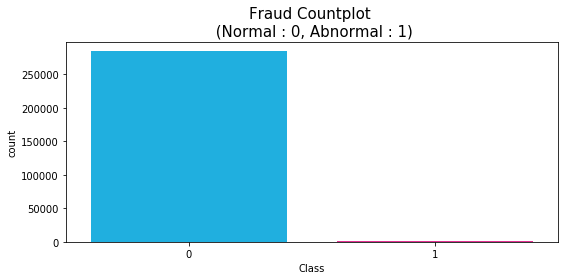

normal data : 284315
abnormal data : 492
normal data/total : 0.9982725143693799
abnormal data/total : 0.001727485630620034


In [3]:
# Fraud 클래스 비율 확인
plt.figure(figsize = (8,4))
my_pal = {0:'deepskyblue',1:'deeppink'}
sb.countplot(x = 'Class', data = df, palette=my_pal)
plt.title('Fraud Countplot \n (Normal : 0, Abnormal : 1)',fontsize = 15)
plt.tight_layout()
plt.show()

fraud_counts = df.Class.value_counts()
print(f'normal data : {fraud_counts[0]}')
print(f'abnormal data : {fraud_counts[1]}')
print(f'normal data/total : {fraud_counts[0]/df.shape[0]}')
print(f'abnormal data/total : {fraud_counts[1]/df.shape[0]}')

## Time, Amount 분포

Time은 최초로 데이터를 수집한 시점부터 경과시간(초)을 의미한다. 24시간(86400초)을 기준으로 일정한 주기성을 띈다. Amount의 분포는 왜도가 큰 형태다. log 스케일링(Scaling)을 적용해 왜도를 줄이기로 한다.

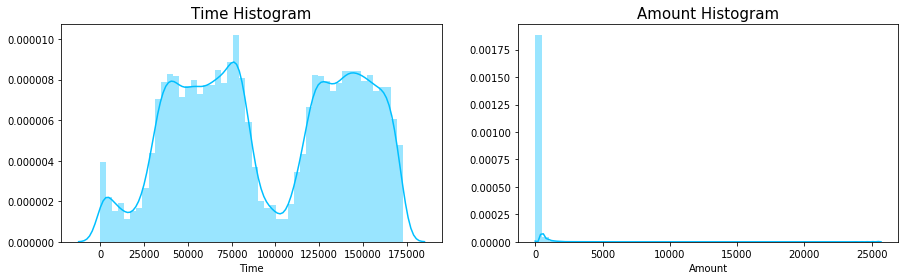

In [4]:
# Time,Amount 분포 확인
fig,ax = plt.subplots(1,2,figsize = (15,4))
sb.distplot(df['Time'],ax = ax[0],color = 'deepskyblue')
ax[0].set_title('Time Histogram',fontsize = 15)
sb.distplot(df['Amount'], ax=ax[1],color = 'deepskyblue')
ax[1].set_title('Amount Histogram',fontsize = 15)
plt.show()

## Time vs Class

정상데이터와 비정상데이터가 많이 겹쳐있다. 다만, 50000-10000, 10000-15000 구간에서 정상거래데이터와 이상거래데이터의 비율차이가 존재하는 것으로 보인다. Time축을 기준으로 결정경계를 형성하기에는 어려워 보이나, 구간별 이상거래데이터 비율을 기준으로 더미(Dummy) 변수를 생성하면 성능을 향상시킬 수 있을 것 같다.

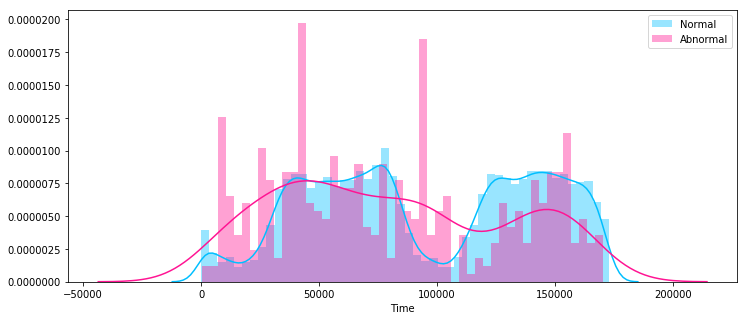

In [5]:
plt.figure(figsize=(12,5))
sb.distplot(df.loc[df['Class']==0,'Time'],bins = 50, color = 'deepskyblue', label = 'Normal')
sb.distplot(df.loc[df['Class']==1,'Time'],bins = 50, color = 'deeppink', label = 'Abnormal')
plt.legend()
plt.show()

## Amount VS Class(분포)

Class에 따른 Amount의 분포는 크게 차이가 없어보인다. Time과 마찬가지로 구간별 이상거래데이터 비율을 확인한 후, 더미변수를 생성한다.

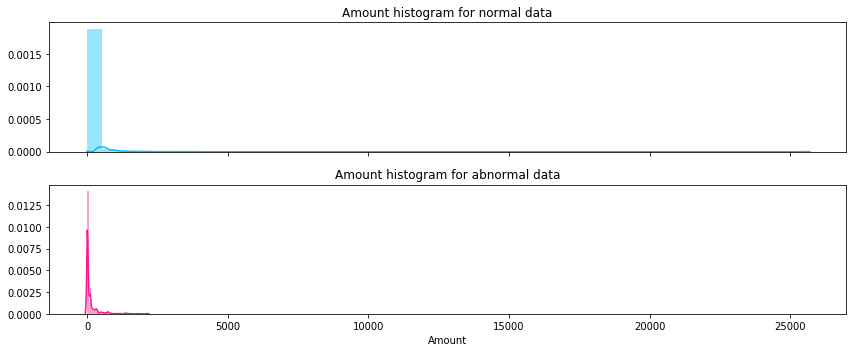

In [6]:
fig,ax = plt.subplots(2, 1, sharex=True, figsize=(12,5))

sb.distplot(df.loc[df['Class']==0,'Amount'],bins = 50, color = 'deepskyblue',ax = ax [0])
sb.distplot(df.loc[df['Class']==1,'Amount'],bins = 50, color = 'deeppink',ax = ax [1])

ax[0].set_title('Amount histogram for normal data')
ax[1].set_title('Amount histogram for abnormal data')
ax[0].set_xlabel('')
plt.tight_layout()
plt.show()

## Amount VS Class(구간별 비율)

Amount를 10개 구간으로 나누고, 이상거래데이터의 비율을 확인한결과 0-1달러, 59.8-203달러 구간의 비율이 비교적 높다.

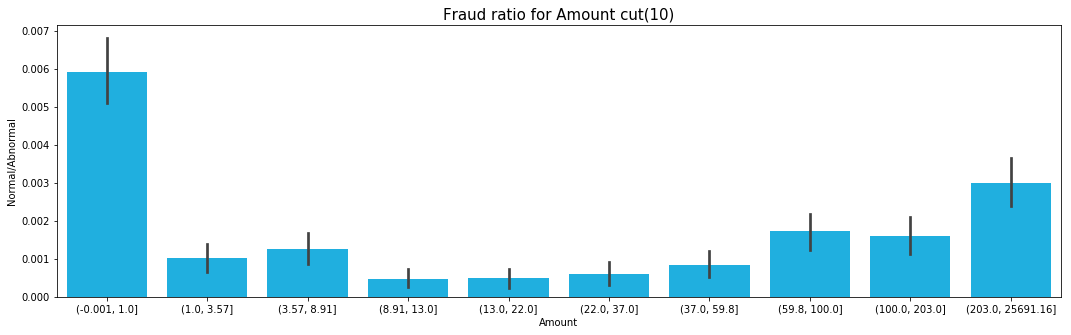

In [7]:
# Amount 를 10개 구간으로 나눔
plt.figure(figsize = (18,5))
sb.barplot(x=pd.qcut(df.Amount,10),y=df['Class'], color = 'deepskyblue') 
plt.title('Fraud ratio for Amount cut(10)',fontsize = 15)
plt.ylabel('Normal/Abnormal')
plt.show()

## V 분포

이상거래데이터와 정상거래데이터 분포의 차이가 있는 V 변수를 선정해본다. 'V1','V2','V5','V6','V8','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28'은 분포가 겹쳐있어 결정경계를 형성하기 어려워 보인다.

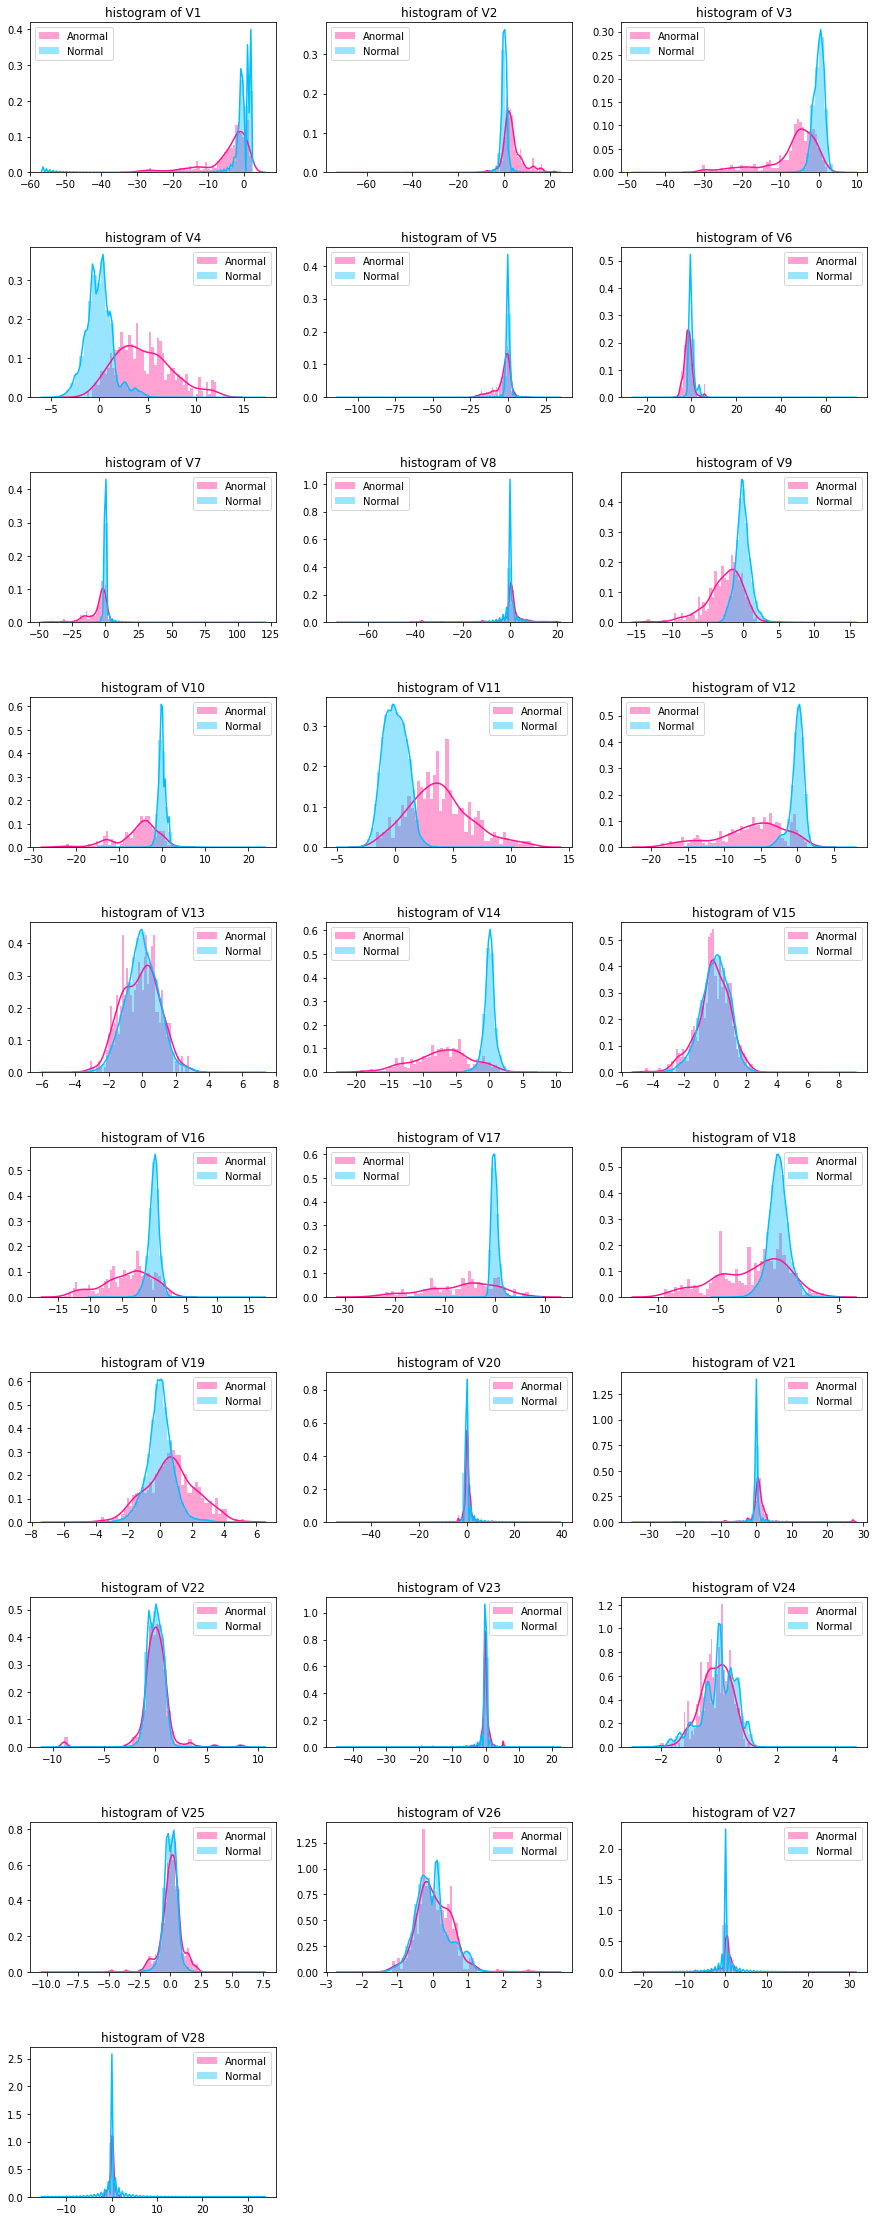

In [11]:
figsize=(15,40)
cols = 3
gs = gridspec.GridSpec(nrows=10,ncols = cols)
gs.update(hspace=0.5)
fig = plt.figure(num=1, figsize=figsize)
ax = []
for idx, v in enumerate(df.columns[1:29]):
    row = (idx//cols)
    col = idx%cols
    ax.append(fig.add_subplot(gs[row,col]))
    sb.distplot(df[v][df.Class == 1], bins=50, label='Anormal',color = 'deeppink',ax = ax[-1])
    sb.distplot(df[v][df.Class == 0], bins=50, label='Normal',color = 'deepskyblue',ax = ax[-1])
    ax[-1].legend()
    ax[-1].set_xlabel('')
    ax[-1].set_title(f'histogram of {v}')

## T-test, KS-test for V

각 V변수에 대해 이상거래데이터와 정상거래데이터 분포가 다른지 확인하기 위해 T-test와 KS-test를 적용한다. T-Test 를 통과하지 못한 변수는 'V8', 'V22', 'V23', 'V25', T-Test와 KS-Test를 둘다 통과하지 못한 변수는 'V22'다. KS-test는 두 분포의 누적확률분포(CDF)차이의 최댓값을 통계량으로 설정한다. 이에 눈으로 보기에는 차이가 있는 분포도 평균이 비슷하다면 KS-test를 통과할 가능성이 있다.


In [24]:
# t-test, ks-test for V
# compare distribution  Fraud - No Fraud data for V
def compare2dist(df,v):
    
    fraud,no_fraud = df.loc[df['Class']==0,v].values,df.loc[df['Class']==1,v].values
    
    # t-test
    t_pval = st.ttest_ind(fraud,no_fraud,equal_var=False)[1]
    
    # 2 sample ks test
    ks_pval = st.ks_2samp(fraud,no_fraud)[1]
    
    return t_pval, ks_pval
   
v_list = list(df.columns[1:29])
t_pval_list = []
ks_pval_list = []

for v in v_list:
    t_pval, ks_pval = compare2dist(df,v)
    t_pval_list.append(t_pval)
    ks_pval_list.append(ks_pval)

In [25]:
pval = pd.DataFrame(list(zip(t_pval_list, ks_pval_list)))
pval.columns = ['t-test','ks-test']
pval.index = v_list

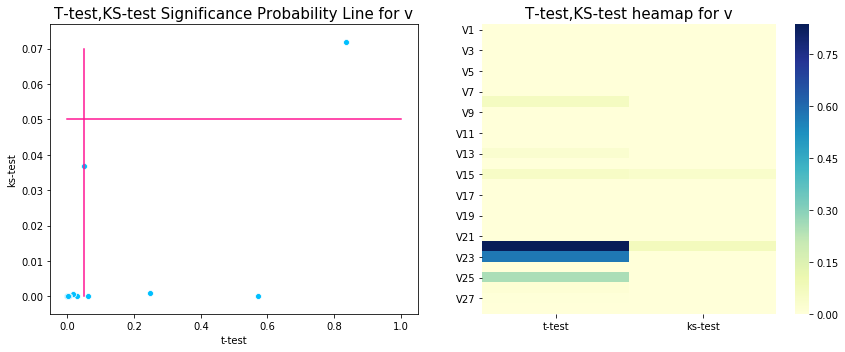

In [27]:
# T-test, KS-test 결과 시각화
fig,ax = plt.subplots(1,2,figsize = (12,5))
sb.scatterplot(pval['t-test'],pval['ks-test'],ax=ax[0],color = 'deepskyblue')
ax[0].plot([0.05,0.05],[0,0.07],color = 'deeppink')
ax[0].plot([0,1],[0.05,0.05],color = 'deeppink')
ax[0].set_title('T-test,KS-test Significance Probability Line for v',fontsize = 15)
sb.heatmap(pval,cmap = 'YlGnBu',ax=ax[1])
ax[1].set_title('T-test,KS-test heamap for v',fontsize =15)
plt.tight_layout()
plt.show()

In [24]:
both = list(pval.loc[(pval['ks-test']>0.05)&(pval['t-test']>0.05),:].index)
under_t = list(pval.loc[(pval['t-test']>0.05),:].index)
print(f'T-Test 와 KS-Test를 통과하지 못한 변수 : {both}' )
print(f'T-Test 를 통과하지 못한 변수 :{under_t}' )

T-Test 와 KS-Test를 통과하지 못한 변수 : ['V22']
T-Test 를 통과하지 못한 변수 :['V8', 'V22', 'V23', 'V25']


# Preprocessing

Amount는 분포의 왜도가 크기때문에 로그(Log) 스케일링, Time은 로버스트(Robust) 스케일링 처리했다.
log Scaled Amount의 2-4 구간에서 이상거래비율이 높은 것으로 보인다.

In [8]:
df['Amount_scaled'] = df.Amount.apply(lambda x : np.log(x+1))
df['Time_scaled'] =  muresa.robustScale(df['Time'])

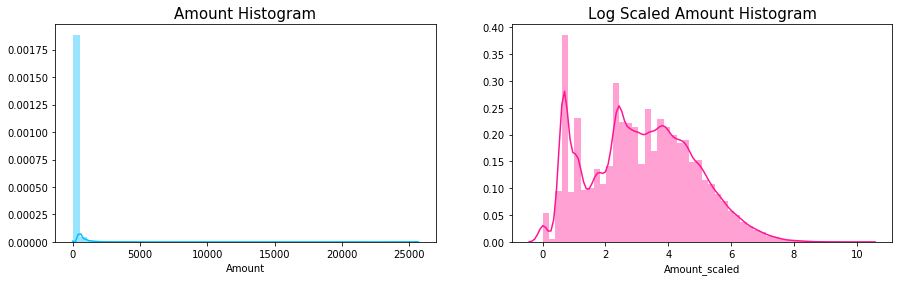

In [9]:
# Amount Log 스케일링 전/후 비교
fig,ax = plt.subplots(1,2,figsize = (15,4))
sb.distplot(df['Amount'],ax = ax[0],color = 'deepskyblue')
ax[0].set_title('Amount Histogram',fontsize = 15)
sb.distplot(df['Amount_scaled'], ax=ax[1],color = 'deeppink')
ax[1].set_title('Log Scaled Amount Histogram',fontsize = 15)
plt.show()

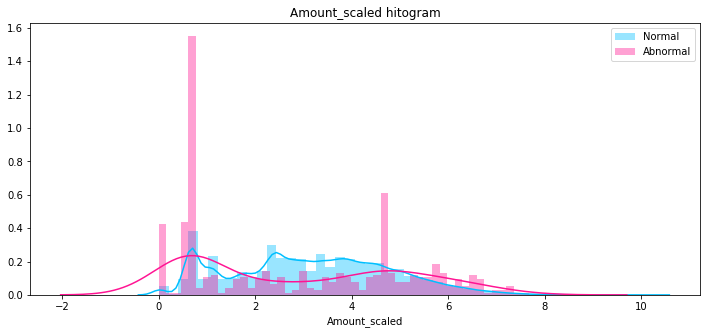

In [10]:
plt.figure(figsize=(12,5))
sb.distplot(df.loc[df['Class']==0,'Amount_scaled'],bins = 50, color = 'deepskyblue', label = 'Normal')
sb.distplot(df.loc[df['Class']==1,'Amount_scaled'],bins = 50, color = 'deeppink', label = 'Abnormal')
plt.title('Amount_scaled hitogram')
plt.legend()
plt.show()

# Feature Engineering

## Time to Day, Hour

Time을 일(Day), 시간(Hour)로 나눈 후 날짜에 따른 이상거래 비율을 확인했다. 카이제곱검정결과 p-value는 0.006으로, 날짜와 이상거래비율은 독립이 아닌것으로 보인다.

In [42]:
# second to Day Hour
df['Time_str'] = df['Time'].apply(lambda s : str(datetime.timedelta(seconds=s)))
df['Day'] = df['Time_str'].apply(lambda s: '0' if len(s.split(","))==1 else s.split(",")[0][0])
df['Hour'] = df['Time_str'].apply(lambda s: s.split(",")[-1].split(":")[0].strip())

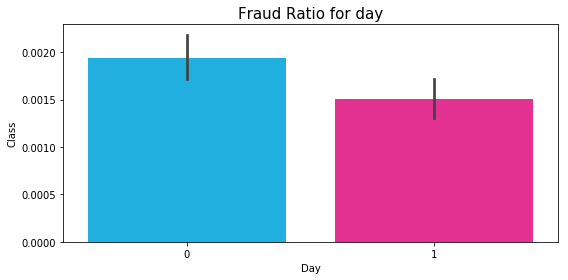

Day 0 Fraud ratio : 0.0019407953807688589
Day 1 Fraud ratio : 0.0015069168196199141
p-value : 0.006099011801510146
h0:Day and Class are independent,rejected


In [43]:
# Day에 따른 이상 거래 비율 확인
plt.figure(figsize = (8,4))
sb.barplot(x='Day',y = 'Class',data = df,palette=('deepskyblue','deeppink'))
plt.title('Fraud Ratio for day',fontsize = 15)
plt.tight_layout()
plt.show()

# 카이제곱검정
ct = pd.crosstab(df['Day'], df['Class'])
(chi2, p, dof, ex)= st.chi2_contingency(ct)
print(f'Day 0 Fraud ratio : {ct.iloc[0,1]/ct.iloc[0].sum()}'), 
print(f'Day 1 Fraud ratio : {ct.iloc[1,1]/ct.iloc[1].sum()}')
print(f'p-value : {p}\nh0:Day and Class are independent,rejected')

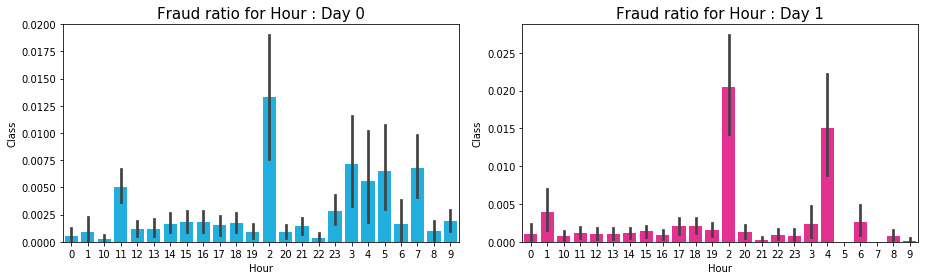

In [44]:
# 날짜에 따른 이상거래비율
fig, ax = plt.subplots(1,2,figsize = (13,4))
sb.barplot(df.loc[df['Day']=='0','Hour'],df['Class'],ax = ax[0],color = 'deepskyblue')
ax[0].set_title('Fraud ratio for Hour : Day 0',fontsize = 15 )
sb.barplot(df.loc[df['Day']=='1','Hour'],df['Class'],ax = ax[1],color = 'deeppink')
ax[1].set_title('Fraud ratio for Hour : Day 1',fontsize = 15)
plt.tight_layout()
plt.show()

## Amount_scaled to Interval

In [45]:
df['Amount_interval']=pd.qcut(df.Amount,10)

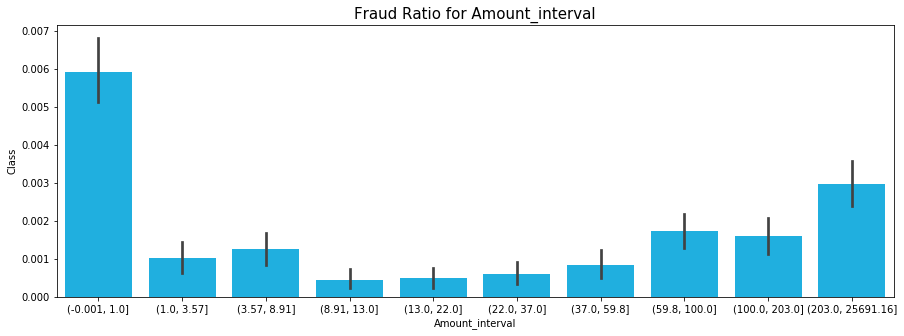

In [46]:
plt.figure(figsize=(15,5))
sb.barplot(x='Amount_interval',y='Class',data=df, color = 'deepskyblue')
plt.title('Fraud Ratio for Amount_interval',fontsize = 15)
plt.show()

## Dummy Variables

In [47]:
#Hour_interval to num
def Hour2num(hour):
    res = '0'
    if hour == '2' :res =  '1'
    elif hour == '4' : res = '2'
    elif (hour == '3')or(hour =='5'): res = '3'
    elif hour == '7' : res = '4'
    elif hour == '11': res = '5'
    else :res = '6'
    return res

In [48]:
#log_Amount_interval to num
def log_Amount_interval2num(interval):
    interval = str(interval)
    if (interval) == '(-0.001, 1.0]': return '1'
    elif (interval) == '(203.0, 25691.16]': return '2'
    else : return '3'

In [49]:
# Hour to dummies
df['Hour'] = df['Hour'].apply(Hour2num)
hour_dummies = pd.get_dummies(df['Hour'],drop_first=True,prefix='Hour')
day_dummies = pd.get_dummies(df['Day'],drop_first=True,prefix='Day')

# Amount to dummies
df['Amount_interval'] = df['Amount_interval'].apply(log_Amount_interval2num)
amount_dummies = pd.get_dummies(df['Amount_interval'],drop_first=True,prefix='Amount')

# Day:Hour interaction term
day_hour_dummies = pd.DataFrame(np.multiply(day_dummies.values,hour_dummies.values))
day_hour_dummies.columns = ['Day1*Hour2','Day1*Hour3','Day1*Hour4','Day1*Hour5','Day1*Hour6']

# Feature Selection

6가지 변수 선택 결과를 비교했다. 정밀도가 낮게 나오는 문제를 해결하기 위해 이상거래데이터와 정상거래데이터 각각 10%를 테스트셋으로 구성하고, 나머지를 트레이닝셋으로 만들었다. 비교할 데이터는 다음과 같다.

- df1 : Time(Robust Scaled)+Amount(Log Scaled)+[V1~V28]
- df2 : Amount(Log Scaled)+[V1-V28]
- df3 : Time(Dummy)+Amount(Dummy)+(V1-V28)
- df4 : Time(Dummy)+Amount(Dummy)+Time * Amount(Interactive Dummy)+(V1-V28)
- df5 : Time(Robust Scaled)+Amount(Log Scaled)+(V-V_bad) # 눈으로 분포를 확인했을때 많이 겹친 V 변수를 제거했다.
- df6 : Time(Robust Scaled)+Amount(Log Scaled)+(V - kst_bad) # T-test, KS-test를 통과하지 못한 변수를 제거했다.

로지스틱 회귀(Logistic Regression)로 테스트한 결과 3번째 데이터셋의 결과가 가장 좋았다. 

In [50]:
# Check Columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'Amount_scaled', 'Time_scaled', 'Time_str', 'Day', 'Hour',
       'Amount_interval'],
      dtype='object')

In [51]:
# Original, -Time
df_1 = df.drop(columns=['Time','Time_str','Day', 'Hour', 'Amount_interval']) # original
df_2 = df.drop(columns=['Time','Time_str','Day', 'Hour', 'Amount_interval','Time_scaled']) # -Time

# Dummies
df_3 = df.drop(columns=['Amount','Time','Time_str','Day', 'Hour','Time_scaled','Amount_interval'])
df_3 = pd.concat([df_3,amount_dummies,day_dummies,hour_dummies],axis = 1) #day,hour Dummy
df_4 = pd.concat([df_3,amount_dummies,day_dummies,hour_dummies,day_hour_dummies],axis = 1) # day:hour Dummy interaction

# V 
v_bad = ['V1','V2','V5','V6','V8','V13','V15','V20','V21','V22','V23','V24','V25','V26','V27','V28'] #눈으로 봤을때 겹치는 변수
kst_bad = ['V8','V15','V22','V23','V25'] # ks-test, t-test 를 통과하지 못한 변수

df_5 = df.drop(['Time','Time_str','Day', 'Hour', 'Amount_interval','Time']+v_bad,axis =1)
df_6 = df.drop(['Time','Time_str','Day', 'Hour', 'Amount_interval','Time']+kst_bad,axis =1)

# 변수 선택에 따른 결과 비교

In [83]:
res_list = []

for i in range(1,7):  
    
    dat = globals()[f'df_{i}']
    
    # Normal, Abnormal Data 에서 30%씩 추출해서 Test set 구성
    x_train,x_test,y_train,y_test = SplitByRatio(dat,ratio = 0.3,random_state = 123) #5 Functions - SplitByRatio
    glm = LogisticRegression().fit(x_train,y_train)
    y_pred = glm.predict_proba(x_test)
    res_list.append(EvaluateModel(y_test,y_pred)) # 5 Functions - EvaluateModel

In [84]:
# 변수 선택 테스트결과 출력
result_var_selection = pd.DataFrame(res_list)
result_var_selection.index = range(1,7)
result_var_selection

,acc,average precision,confusion matrix,f1 score,precision,recall
1,0.999298,0.838309,"[[85283, 11], [49, 98]]",0.765625,0.899083,0.666667
2,0.999298,0.839124,"[[85282, 12], [48, 99]]",0.767442,0.891892,0.673469
3,0.999345,0.840535,"[[85283, 11], [45, 102]]",0.784615,0.902655,0.693878
4,0.999309,0.837135,"[[85283, 11], [48, 99]]",0.770428,0.900000,0.673469
5,0.999251,0.816558,"[[85281, 13], [51, 96]]",0.750000,0.880734,0.653061
6,0.999274,0.832521,"[[85282, 12], [50, 97]]",0.757812,0.889908,0.659864


# Sampling에 따른 결과비교

4가지 샘플링(언더샘플링,오버샘플링,SMOTE,Class별 비율 추출) 방법에 따른 결과를 비교 한다.로지스틱 회귀분석을 사용하고, 트레이닝셋과 테스트셋의 비율은 0.3으로 통일한다. 데이터셋으로는 3번(V1~V28+Amount[dum]+Time[dum])을 사용한다. 샘플링 처리한 데이터에서 테스트할 경우 과적합(Overfitting)될 가능성이 있다. 이를 방지하기 위해 미리 테스트셋을 나눠놓고 트레이닝셋에 대해서만 샘플링했다.

언더샘플, 오버샘플, SMOTE모두 예측성능이 떨어졌다.(Class 0:1 = 1:1 적용할 경우).세 방법 모두 민감도는 0.9이상(0.96,0.93,0.93)으로 일반 샘플링(0.65)에 비해 크게 개선됐다. 그러나 정밀도는 모두 0.1이하로 측정됐다. 특히 언더샘플링 결과는 평균정밀도(Average Precision, AP)가 0.54로 기준확률을 수정해 결과를 보정할 여지가 없다. 오버샘플과 SMOTE의 평균정밀도는 각각 0.79,0.8로 비교적 높으나, 일반 샘플링(0.83)보다 낮다.

민감도가 높은데 정밀도가 낮다는 것은 0에 해당하는 데이터를 1로 예측한 경우가 많다는 의미다. 즉 언더샘플링,오버샘플링,SMOTE를 적용할 경우 과적합이 발생했다고 판단할 수 있다.

과적합을 피하기위해 샘플링시 Class 0과 1의 비율을 0.3으로 조정해보니, 언더샘플링의 평균정밀도가 0.78로 개선됐다. 그러나 민감도는 모두 0.1 수준에 머물렀다.

In [85]:
from imblearn.over_sampling import RandomOverSampler

In [107]:
# 각 클래스에서 30%씩 뽑아 트레인,테스트셋을 구성한다
x_train_,x_test_,y_train_,y_test_ = SplitByRatio(dat,0.3,123) #5 Functions - SplitByRatio
x_train_under,tmp,y_train_under,tmp_2 = UnderSampling(x_train_,y_train_,ratio = 0,under = 0.3) # 언더샘플링,50%
x_train_over,tmp,y_train_over,tmp_2 = OverSampling(x_train_,y_train_,ratio = 0,over = 0.3) # 오버샘플링,50%
x_train_smote,tmp,y_train_smote,tmp_2 = SMOTESampling(x_train_,y_train_,ratio = 0,over = 0.3) # SMOTE, 50%

In [108]:
# 각 트레이닝셋 개수 확인
print(f'0.3 Sampled train set : {x_train_.shape} \nUndersampled train set : {x_train_under.shape} \nOversampled train set : {x_train_over.shape} \nSMOTE train set : {x_train_smote.shape}')

0.3 Sampled train set : (199366, 26) 
Undersampled train set : (1495, 26) 
Oversampled train set : (258727, 26) 
SMOTE train set : (258727, 26)


In [109]:
res_samp_list = []
sampling_list = ['','under','over','smote']

for samp in sampling_list:  
    
    x_train = globals()[f'x_train_{samp}']
    y_train = globals()[f'y_train_{samp}']
    
    glm = LogisticRegression().fit(x_train,y_train)
    y_pred = glm.predict_proba(x_test)
    res_samp_list.append(EvaluateModel(y_test,y_pred)) # 5 Functions - EvaluateModel

In [110]:
result_sampling = pd.DataFrame(res_samp_list)
result_sampling.index = ['0.3 Sampled','Undersampled','Oversampled','SMOTE']
result_sampling

,acc,average precision,confusion matrix,f1 score,precision,recall
0.3 Sampled,0.999274,0.832521,"[[85282, 12], [50, 97]]",0.757812,0.889908,0.659864
Undersampled,0.992158,0.772759,"[[84635, 659], [11, 136]]",0.288747,0.171069,0.925170
Oversampled,0.991526,0.814427,"[[84581, 713], [11, 136]]",0.273092,0.160188,0.925170
SMOTE,0.993340,0.818556,"[[84737, 557], [12, 135]]",0.321812,0.195087,0.918367


# Modeling 

## Logistic Regression,SVC,KNN,Tree

Grid Search CV로 로지스틱회귀, 서포트벡터머신(SVC), K-최근접이웃(KNN),결정트리(Decision Tree)의 최적 파라메터를 탐색한 후 결과를 비교한다.

In [111]:
# 모델 정의
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "Tree": DecisionTreeClassifier()
}

In [112]:
# 각 모델 별 파라메터 정의
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
knn_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

In [1]:
# Grid Search CV로 최적 파라메터 탐색

# 로지스틱 회귀
grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(x_train, y_train)
log_reg = grid_log_reg.best_estimator_

# KNN
grid_knears = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knears.fit(x_train, y_train)
knn = grid_knears.best_estimator_

# SVC
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(x_train, y_train)
svc = grid_svc.best_estimator_

# Decision Tree
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(x_train, y_train)
d_tree = grid_tree.best_estimator_

NameError: name 'GridSearchCV' is not defined

In [ ]:
pickle.dump(log_reg, open('loge_bst.sav', 'wb'))
pickle.dump(knn, open('knn_best.sav', 'wb'))
pickle.dump(svc, open('svc_best.sav', 'wb'))
pickle.dump(d_tree, open('d_tree_best.sav', 'wb'))

In [ ]:
y_log_best = grid_log_reg.predict_proba(x_test)
y_knn_best = grid_grid_knears.predict_proba(x_test)
y_svc_best = grid_svc.grid_svc(x_test)
y_tree_best = grid_tree.grid_scv(x_test)

In [ ]:
model_list=['log','knn','svc','tree']
res_model_list = []

for i in model_list:  
    y_pred = globals()[f'y_{i}_best']
    res_list.append(EvaluateModel(y_test,y_pred)) # 5 Functions - EvaluateModel

In [ ]:
result_model = pd.DataFrame(model_list)
result_sampling.index = ['Logistic Regression','KNN','SVC','Tree']
result_sampling

## Neural Network

# Conclusion

# Functions

In [28]:
def EvaluateModel(y_true,y_pred,true_idx=1,thresholds = 0.5):
    
    from sklearn import metrics # for result
    import matplotlib.pyplot as plt # for visualization
    
    # tranform y_pred into integer array
    y_pred_val = ([1 if prob>thresholds else 0 for prob in y_pred[:,true_idx]])
    
    # counfusion matrix
    conf_mat = metrics.confusion_matrix(y_true,y_pred_val)    
    acc = metrics.accuracy_score(y_true,y_pred_val)   
    re = metrics.recall_score(y_true,y_pred_val) 
    pre = metrics.precision_score(y_true,y_pred_val)
    f1 = metrics.f1_score(y_true,y_pred_val)   
    avg_pre = metrics.average_precision_score(y_true,y_pred[:,true_idx])      
    
    # 결과 저장
    result_dic = {
        'confusion matrix':conf_mat,
        'acc':acc,
        'recall':re,
        'precision':pre,
        'f1 score':f1,
        'average precision':avg_pre
    }
    return result_dic

In [29]:
# 클래스마다 일정 비율씩 추출해 테스트셋을 구성, 나머지는 트레이닝 셋

def SplitByRatio(dat,ratio,random_state=123):    
    np.random.seed(random_state)

    ones = dat[dat['Class']==1].copy()
    zeros = dat[dat['Class']==0].copy()

    idx1 = np.random.choice(ones.shape[0],int(np.floor(ones.shape[0]*ratio)), replace=False)
    idx0 = np.random.choice(zeros.shape[0],int(np.floor(zeros.shape[0]*ratio)), replace=False)

    test_ones = ones.iloc[idx1].copy() 
    train_ones = ones.drop(ones.index[idx1])
    test_zeros = zeros.iloc[idx0].copy()
    train_zeros = zeros.drop(zeros.index[idx0])

    train = pd.concat([train_ones, train_zeros])
    test = pd.concat([test_ones, test_zeros])

    x_train,y_train = train.drop('Class',axis = 1),train.Class
    x_test,y_test = test.drop('Class',axis = 1),test.Class
    
    return x_train,x_test,y_train,y_test

In [92]:
def StratifiedSampling(data, label, ratio=0.3):
    X_train, X_test, y_train, y_test = train_test_split(
        data, label, test_size=ratio, stratify=y )
    return X_train, X_test, y_train, y_test    

def UnderSampling(data, label, under=1.0, ratio=0.3,random_state=123):
    # under = Minor class / Major class
    rus = RandomUnderSampler(sampling_strategy=under,random_state=random_state) 
    X_resampled, y_resampled = rus.fit_resample(data, label)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio ,random_state=123)
    return X_train, X_test, y_train, y_test

def OverSampling(data, label, over=1.0, ratio=0.3,rs=123):

    rus = RandomOverSampler(sampling_strategy=over, random_state=123)

    X_resampled, y_resampled = rus.fit_resample(data, label)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio, random_state = rs)
    return X_train, X_test, y_train, y_test

def SMOTESampling(data, label, over=1.0, ratio=0.3,random_state=123):
    # over = Minor class / Major class
    rus = SMOTE(sampling_strategy=over,random_state=123) 
    X_resampled, y_resampled = rus.fit_resample(data, label)
    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=ratio,random_state = random_state)
    return X_train, X_test, y_train, y_test